#### Objective :

The objectivce of this case study is to demonstrate multivariate regression for each of the continuous attributes of the dataset w.r.t the remaining attributes of the datset. In Machine Learning circles this datset is popular by the namer of 'White-wine quality dataset'. The attributes of the dataset are as follows: *fixed acidity, volatile acidity, citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol and quality*. Among these attributes, the attribute '*quality*' is the only non-continuous/discrete one, since it takes values from among a fixed set.

#### DATA SOURCE : https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

The Following piece of code very concisely demosntrates the performance of various regression models with regrad to predicting the composition of each of the continuous features w.r.t the rest of the features present in the dataset. In the subsequent sections of this case study, multivariate regression, along with relevant scatter plots, shall be demonstrated for each continuous feature with respect to the rest of the features separately. 

In [1]:
import pandas as pd
import numpy as np

wine_data=pd.read_csv('winequality-white.csv',sep=';')

list1=[]
list2=[]
list3=[]
list4=[]
for attribute in wine_data.loc[:,'fixed acidity':'alcohol'].columns:
    Y=wine_data.loc[:,attribute]
    X=wine_data.drop(labels=attribute,axis=1)
    
    from sklearn.model_selection import train_test_split
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=500,random_state=0)
    
    from sklearn.preprocessing import StandardScaler
    standardizer=StandardScaler()
    X_train=standardizer.fit_transform(X_train)
    X_test=standardizer.transform(X_test)
    
    from sklearn.linear_model import LinearRegression
    linreg=LinearRegression()
    
    from sklearn.tree import DecisionTreeRegressor
    tree_reg=DecisionTreeRegressor()
    
    from sklearn.svm import SVR
    support_vector_regressor=SVR()
    
    from sklearn.ensemble import RandomForestRegressor
    random_regressor=RandomForestRegressor()
    
    from sklearn.metrics import r2_score
    
    linreg.fit(X_train,Y_train)
    tree_reg.fit(X_train,Y_train)
    support_vector_regressor.fit(X_train,Y_train)
    random_regressor.fit(X_train,Y_train)
    
    Y_pred1=linreg.predict(X_test)
    Y_pred2=tree_reg.predict(X_test)
    Y_pred3=support_vector_regressor.predict(X_test)
    Y_pred4=random_regressor.predict(X_test)
    
    score1=100*r2_score(Y_test,Y_pred1)
    score2=100*r2_score(Y_test,Y_pred2)
    score3=100*r2_score(Y_test,Y_pred3)
    score4=100*r2_score(Y_test,Y_pred4)
    
    list1.append(score1)
    list2.append(score2)
    list3.append(score3)
    list4.append(score4)

attribute_classifier_performance=pd.DataFrame(index=wine_data.loc[:,'fixed acidity':'alcohol'].columns,
                                             data={'LinearRegression':list1,'DecisionTreeRegression':list2,'SupportVectorRegression':list3,'RandomForestRegression':list4})
attribute_classifier_performance

,DecisionTreeRegression,LinearRegression,RandomForestRegression,SupportVectorRegression
fixed acidity,52.021081,3.038698,67.707325,72.338460
volatile acidity,6.334769,23.944476,51.878066,39.673179
citric acid,22.612411,20.394853,54.331731,42.334337
residual sugar,80.507059,78.117531,84.995732,71.606738
chlorides,-26.163802,14.134060,45.944269,-964.850874
free sulfur dioxide,39.860457,38.375107,64.788446,41.596388
total sulfur dioxide,52.255010,32.936445,66.815206,47.810448
density,75.062085,89.917525,74.018233,-177.723387
pH,39.469402,-5.196094,63.738738,67.960018
sulphates,-1.520701,-15.709965,36.083554,29.520209


#### Importing the relevant libraries :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Loading the dataset :

In [3]:
wine_data=pd.read_csv('winequality-white.csv',sep=';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


#### 1) To predict the fixed acidity based on rest of attributes :

In [4]:
#splitting the datset into input features and target features
X=wine_data.loc[:,'volatile acidity':'quality']
Y=wine_data.loc[:,'fixed acidity']

#splitting the input features and output features fuether into training set and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=48,test_size=500)

#standardizing the test set and training set
from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

#importing various regression models from sklearn
from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

#fitting the various regression models and displaying their respective performances
for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.6969074526728334
R-squared for DecisionTreeRegressor : 0.4701018854482234
R-squared for SVR : 0.7511769118105682
R-squared for RandomForestRegressor : 0.6825702018326731


In [5]:
#since the score is the highest on SVR therefore we will use it
from sklearn.svm import SVR
regressor=SVR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
fixed_acidity=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
fixed_acidity.head()

,Actual,Predicted
3814,7.4,7.141671
3855,5.9,6.372791
4023,7.6,7.279937
514,7.8,7.141359
2776,7.0,6.861456


Text(0.5,1,'fixed_acidity')

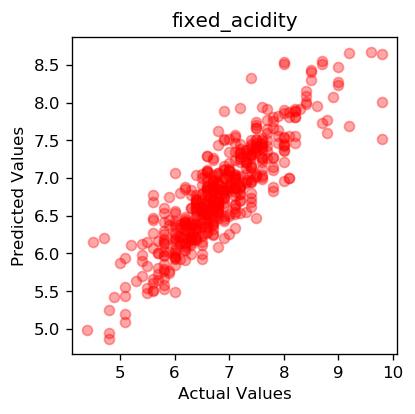

In [6]:
#scatter plot representing the correlation between the actual target values and the corresponding predicted values:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(fixed_acidity['Actual'],fixed_acidity['Predicted'],alpha=0.35,color='red')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('fixed_acidity')

#### Note : In the subsequent sections, we will use exactly the same workflow to fit the regressor, choose the regressor that performs the best , predict the values  and plot the resultant scatter plots.

#### 2) To predict the volatile acidity based on the rest of attributes :

In [7]:
Y=wine_data.loc[:,'volatile acidity']
X=wine_data.drop(labels='volatile acidity',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=48,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.19649781111571896
R-squared for DecisionTreeRegressor : 0.15975547696213932
R-squared for SVR : 0.3614884229659592
R-squared for RandomForestRegressor : 0.5384434544405994


In [8]:
regressor=RFR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
volatile_acidity=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
volatile_acidity.head()

,Actual,Predicted
3814,0.34,0.3085
3855,0.18,0.2340
4023,0.19,0.2060
514,0.28,0.2170
2776,0.36,0.3550


Text(0.5,1,'volatile_acidity')

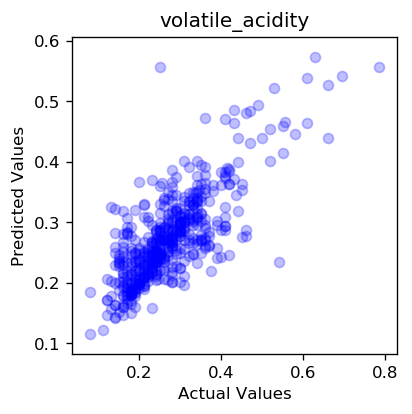

In [9]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(volatile_acidity['Actual'],volatile_acidity['Predicted'],alpha=0.25,color='blue')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('volatile_acidity')

#### 3) To predict the concentration of citric acid based on rest of the attributes :

In [10]:
Y=wine_data.loc[:,'citric acid']
X=wine_data.drop(labels='citric acid',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.20394853352116193
R-squared for DecisionTreeRegressor : 0.1893732682813385
R-squared for SVR : 0.4233433667713711
R-squared for RandomForestRegressor : 0.5759026499343849


In [11]:
regressor=RFR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
citric_acid=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
citric_acid.head()

,Actual,Predicted
2762,0.35,0.260
42,0.26,0.322
1419,0.74,0.468
3664,0.54,0.299
2125,0.22,0.238


Text(0.5,1,'citric_acidity')

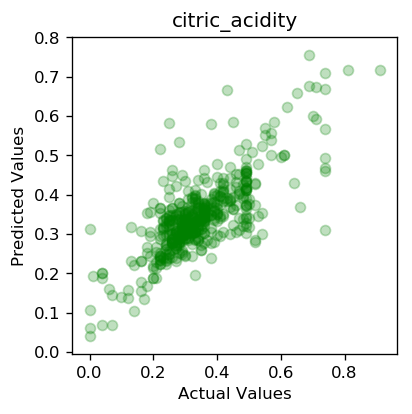

In [12]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(citric_acid['Actual'],citric_acid['Predicted'],alpha=0.25,color='green')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('citric_acidity')

#### 4) To predict the concentration of residual sugar based on  rest of the attributes :

In [13]:
Y=wine_data.loc[:,'residual sugar']
X=wine_data.drop(labels='residual sugar',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.7811753125998975
R-squared for DecisionTreeRegressor : 0.7962951138566743
R-squared for SVR : 0.7160673764791279
R-squared for RandomForestRegressor : 0.8554547079570027


In [14]:
regressor=RFR()
regressor.fit(X_train,Y_train)
Y_pred=regressor.predict(X_test)
residual_sugar=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
residual_sugar.head()

,Actual,Predicted
2762,1.40,1.960
42,7.40,7.950
1419,1.60,2.270
3664,5.70,3.515
2125,12.15,9.540


Text(0.5,1,'residual_sugar')

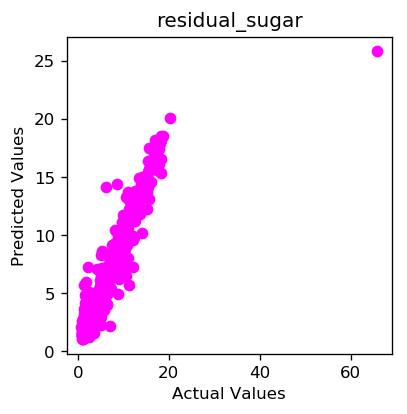

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(residual_sugar['Actual'],residual_sugar['Predicted'],alpha=1,color='magenta')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('residual_sugar')

#### 5) To predict the concentration of chlorides based on rest of the attributes :

In [16]:

Y=wine_data.loc[:,'chlorides']
X=wine_data.drop(labels='chlorides',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.14134059663183918
R-squared for DecisionTreeRegressor : -0.15572270400809796
R-squared for SVR : -9.648508741744443
R-squared for RandomForestRegressor : 0.43520665688323146


In [17]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
linreg=linreg()
linreg.fit(X_train,Y_train)
Y_pred=linreg.predict(X_test)
chlorides=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
chlorides.head()

,Actual,Predicted
2762,0.050,0.045896
42,0.069,0.051651
1419,0.040,0.047399
3664,0.035,0.037963
2125,0.048,0.043779


Text(0.5,1,'chlorides')

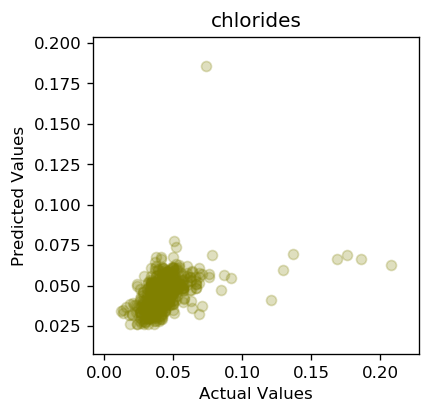

In [18]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(chlorides['Actual'],chlorides['Predicted'],alpha=0.25,color='olive')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('chlorides')

#### 6) To predict the concentration of free sulfur dioxide based on rest of the attributes :

In [19]:
Y=wine_data.loc[:,'free sulfur dioxide']
X=wine_data.drop(labels='free sulfur dioxide',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.38375107058541236
R-squared for DecisionTreeRegressor : 0.4448600077210757
R-squared for SVR : 0.4159638760524276
R-squared for RandomForestRegressor : 0.6522055046257502


In [20]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
free_sulfur_dioxide=pd.DataFrame(data={'Actual':Y_test,'Predict':Y_pred})
free_sulfur_dioxide.head()

,Actual,Predict
2762,8.0,31.8
42,28.0,37.5
1419,27.0,23.9
3664,54.0,55.4
2125,42.0,37.2


Text(0.5,1,'free_sulfur_dioxide')

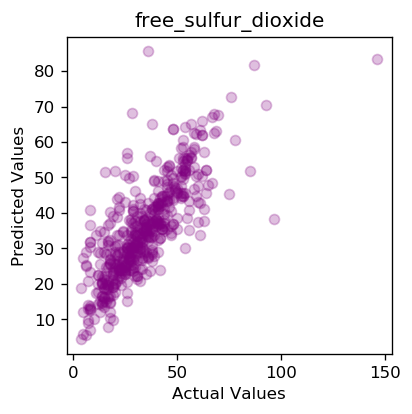

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(free_sulfur_dioxide['Actual'],free_sulfur_dioxide['Predict'],alpha=0.25,color='purple')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('free_sulfur_dioxide')

#### 7) To predict the concentration of total sulfur dioxide based on rest of the attributes :

In [22]:
Y=wine_data.loc[:,'total sulfur dioxide']
X=wine_data.drop(labels='total sulfur dioxide',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.3293644489185943
R-squared for DecisionTreeRegressor : 0.4790099848175521
R-squared for SVR : 0.4781044837828917
R-squared for RandomForestRegressor : 0.6777572746929259


In [23]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
total_sulfur_dioxide=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
total_sulfur_dioxide.head()

,Actual,Predicted
2762,163.0,94.8
42,160.0,158.2
1419,103.0,100.4
3664,155.0,134.3
2125,163.0,147.9


Text(0.5,1,'total_sulfur_dioxide')

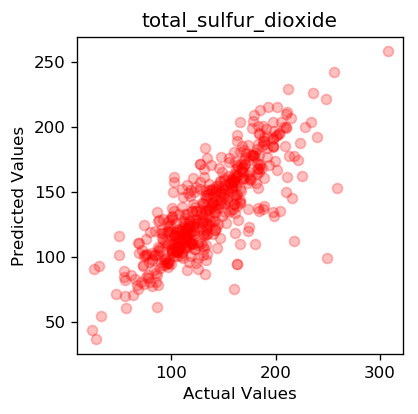

In [24]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(total_sulfur_dioxide['Actual'],total_sulfur_dioxide['Predicted'],alpha=0.25,color='red')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('total_sulfur_dioxide')

#### 8) To predict the density based on rest of the attributes : :

In [25]:

Y=wine_data.loc[:,'density']
X=wine_data.drop(labels='density',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.8991752516858406
R-squared for DecisionTreeRegressor : 0.7499047448871885
R-squared for SVR : -1.7772338681493305
R-squared for RandomForestRegressor : 0.7582011149740107


In [26]:
linreg=linreg()
linreg.fit(X_train,Y_train)
Y_pred=linreg.predict(X_test)
density=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
density.head()

,Actual,Predicted
2762,0.99244,0.992790
42,0.99540,0.995264
1419,0.99160,0.991884
3664,0.98976,0.989566
2125,0.99570,0.996026


Text(0.5,1,'density')

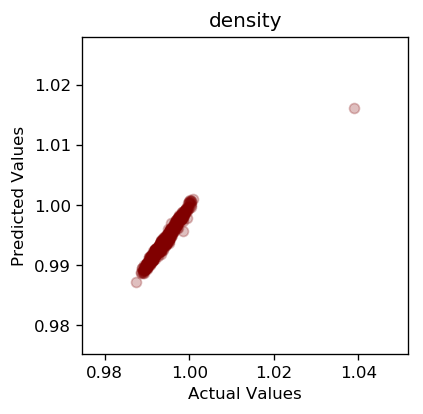

In [27]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(density['Actual'],density['Predicted'],alpha=0.25,color='maroon')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('density')

#### 9) To predicting the pH based on rest of the attributes :

In [28]:
Y=wine_data.loc[:,'pH']
X=wine_data.drop(labels='pH',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : -0.051960938987528626
R-squared for DecisionTreeRegressor : 0.4239684377176244
R-squared for SVR : 0.6796001823519794
R-squared for RandomForestRegressor : 0.6345842083236728


In [29]:
support_vector_regressor=SVR()
support_vector_regressor.fit(X_train,Y_train)
Y_pred=support_vector_regressor.predict(X_test)
pH=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
pH.head()

,Actual,Predicted
2762,3.24,3.211167
42,3.13,3.130390
1419,3.07,3.180803
3664,3.27,3.262235
2125,3.20,3.172570


Text(0.5,1,'pH')

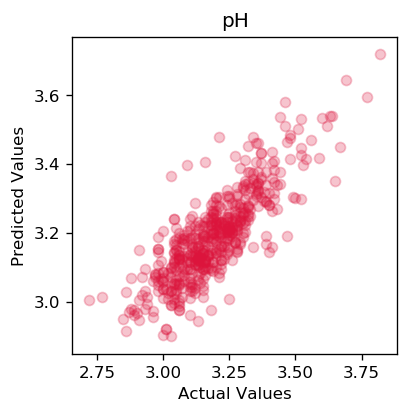

In [30]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(pH['Actual'],pH['Predicted'],alpha=0.25,color='crimson')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('pH')

#### 10) To predict the concentration of sulphates based on rest of the attributes :

In [31]:
Y=wine_data.loc[:,'sulphates']
X=wine_data.drop(labels='sulphates',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : -0.15709965240465973
R-squared for DecisionTreeRegressor : -0.07150670033501672
R-squared for SVR : 0.29520209106250483
R-squared for RandomForestRegressor : 0.39950060003000154


In [32]:
RFR=RFR()
RFR.fit(X_train,Y_train)
Y_pred=RFR.predict(X_test)
sulphates=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
sulphates.head()

,Actual,Predicted
2762,0.42,0.439
42,0.46,0.451
1419,0.40,0.564
3664,0.34,0.619
2125,0.46,0.518


Text(0.5,1,'sulphates')

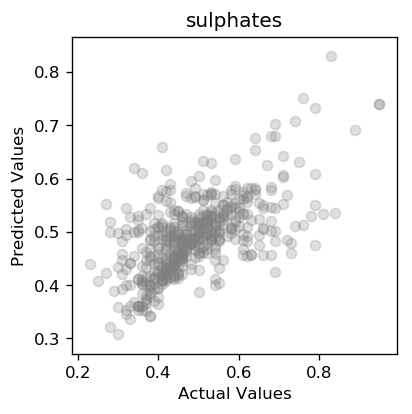

In [33]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(sulphates['Actual'],sulphates['Predicted'],alpha=0.25,color='grey')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('sulphates')

#### 11) To predict the concentration of alcohol based on rest of the attributes :

In [34]:
X1=wine_data.loc[:,'fixed acidity':'sulphates']
X2=wine_data.loc[:,'quality']
X=pd.concat([X1,X2],axis=1)
Y=wine_data.loc[:,'alcohol']

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0,test_size=500)

from sklearn.preprocessing import StandardScaler
standardizer=StandardScaler()
X_train=standardizer.fit_transform(X_train)
X_test=standardizer.transform(X_test)

from sklearn.linear_model import LinearRegression as linreg
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import r2_score

for regressor in [linreg(),DTR(),SVR(),RFR()]:
    regressor.fit(X_train,Y_train)
    Y_pred=regressor.predict(X_test)
    print('R-squared for',regressor.__class__.__name__,':',r2_score(Y_test,Y_pred))

R-squared for LinearRegression : 0.5223765536525399
R-squared for DecisionTreeRegressor : 0.8576305740222647
R-squared for SVR : 0.9190637335675098
R-squared for RandomForestRegressor : 0.9133495751109542


In [35]:
SVR=SVR()
SVR.fit(X_train,Y_train)
Y_pred=SVR.predict(X_test)
alcohol=pd.DataFrame(data={'Actual':Y_test,'Predicted':Y_pred})
alcohol.head()

,Actual,Predicted
2762,10.7,10.726877
42,9.8,9.776172
1419,10.8,11.184564
3664,12.9,12.407346
2125,10.1,10.080246


Text(0.5,1,'alcohol')

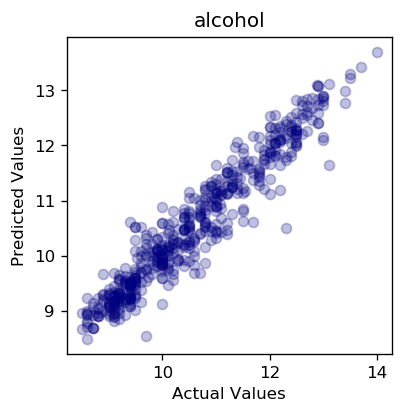

In [36]:
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(3.5,3.5),dpi=120)
ax.scatter(alcohol['Actual'],alcohol['Predicted'],alpha=0.25,color='navy')
ax.set_xlabel('Actual Values')
ax.set_ylabel('Predicted Values')
ax.set_title('alcohol')